### General Instructions

In [126]:
# 1) Import Python Modules & 2) Define Functions: LEAVE SCRIPT AS IT IS!

# 3) Define Working Directory: Change path of working directory!

# 4) Import Data: Specify data information as commented in code!

# 5) Run Functions and Plot Diagram: Run entire code to produce wind rose diagram!

### 1) Import Python Modules

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import math

### 2) Define Functions

In [129]:
def data_and_distribution(Data,n_points):
    
    global df
    
    df = pd.DataFrame(np.zeros((n_points,3)))

    df.iloc[:,0] = [ ((i* (360/n_points) )-( (360/n_points) /2)) for i in range(n_points)]
    df.iloc[:,1] = [ ((i* (360/n_points) )+( (360/n_points) /2)) for i in range(n_points)]

    df.columns = ['Section_Min','Section_Max','Count']

    for i in range(np.size(Data)):
    
        if Data[i] > 360 - (360/n_points) /2 or Data[i] < (360/n_points) /2:
            
            df['Count'].iloc[0] = df['Count'].iloc[0] + 1
    
        else:
        
            for n in range(n_points):
            
                if Data[i] > df['Section_Min'].iloc[n] and Data[i] < df['Section_Max'].iloc[n]:
    
                    df['Count'].iloc[n] = df['Count'].iloc[n] + 1
    
    np.savetxt(name+'.txt', Data, fmt='%1.0f')
    
    return df
   

def plot_rose_diagram(df):
    
    inner_radius = 0.025

    Circle = 0.66

    x_max = 2*np.pi
    x_coords = np.linspace(0, x_max, n_points, endpoint=False)
    width = x_max / n_points

    fig = plt.figure(figsize=(15, 10),dpi=300)
    ax = plt.subplot(111, polar=True)

    # Plot N-W-S-E Cross
    ax.plot([math.pi,0],[Circle,Circle],linewidth=2.5,linestyle='-',c=[.5,.5,.5], zorder=2)
    ax.plot([math.pi/2*3,math.pi/2],[Circle,Circle],linewidth=2.5,linestyle='-',c=[.5,.5,.5], zorder=2)
    
    # Plot Sub-Cross
    ax.plot([math.pi + math.pi/4 ,0 + math.pi/4 ],[Circle/1,Circle/1],linewidth=1,linestyle='-',c=[.5,.5,.5], zorder=2)
    ax.plot([math.pi/2*3  + math.pi/4 ,math.pi/2 + math.pi/4 ],[Circle/1,Circle/1],linewidth=1,linestyle='-',c=[.5,.5,.5], zorder=2)
    
    ax.bar(
        x_coords,
        Circle/2,
        width=width,
        bottom=Circle/2,
        color=[.95,.95,.95],
        edgecolor="none",
        linewidth=0,
        zorder=1
    )
    ax.bar(
        x_coords,
        inner_radius,
        width=width,
        bottom=0,
        color="w",
        edgecolor="w",
        linewidth=1,
        zorder=4
    )
    bars = ax.bar(
        x_coords,
        df['Count'] / max(df['Count']),
        width=width,
        bottom=inner_radius,
        color=[.3,.3,.3],      # select a color of choice (z.b: "lightpink","black","grey","green","red", etc.)
        edgecolor="k",
        linewidth=1.5,
        zorder=5
    )

    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)

    ax.set_rticks([])
    ax.grid(True)

    plt.axis("off")     # put "off" to remove polar axis
    
    fig.tight_layout()
    
    plt.annotate( 'n = '+ str(np.size(data)) , xy=(0 , 0.9 ) , fontsize = 100 , fontname='Calibri' ) 
    
    fig.savefig(name+'.png',dpi=300,transparent=True)

    plt.show()

### 3) Define Working Directory

In [130]:
cd "C:\Users\Proc-PC\Desktop"

C:\Users\Proc-PC\Desktop


### 4) Import Data

In [1]:
name = 'CAT4_C'         # give correct name of unit
manual_import = 'yes'     # put "yes" if you want to insert measurements manually; if "no": code will look for a txt file (name.txt) containing measurements


if manual_import == 'yes':
    data = [134,126,132,101]      # insert comma-separated measurements into []-brackets
    
elif manual_import == 'no':
    data = [int( open(name+'.txt').read().split()[i] ) 
            for i in range(np.size( open(name+'.txt').read().split() ))]   # code will read txt file with given unit name

n_points = 24                  # defines the number of sections of the wind rose diagram ("plotting resolution")

### 5) Run Functions and Plot Diagram

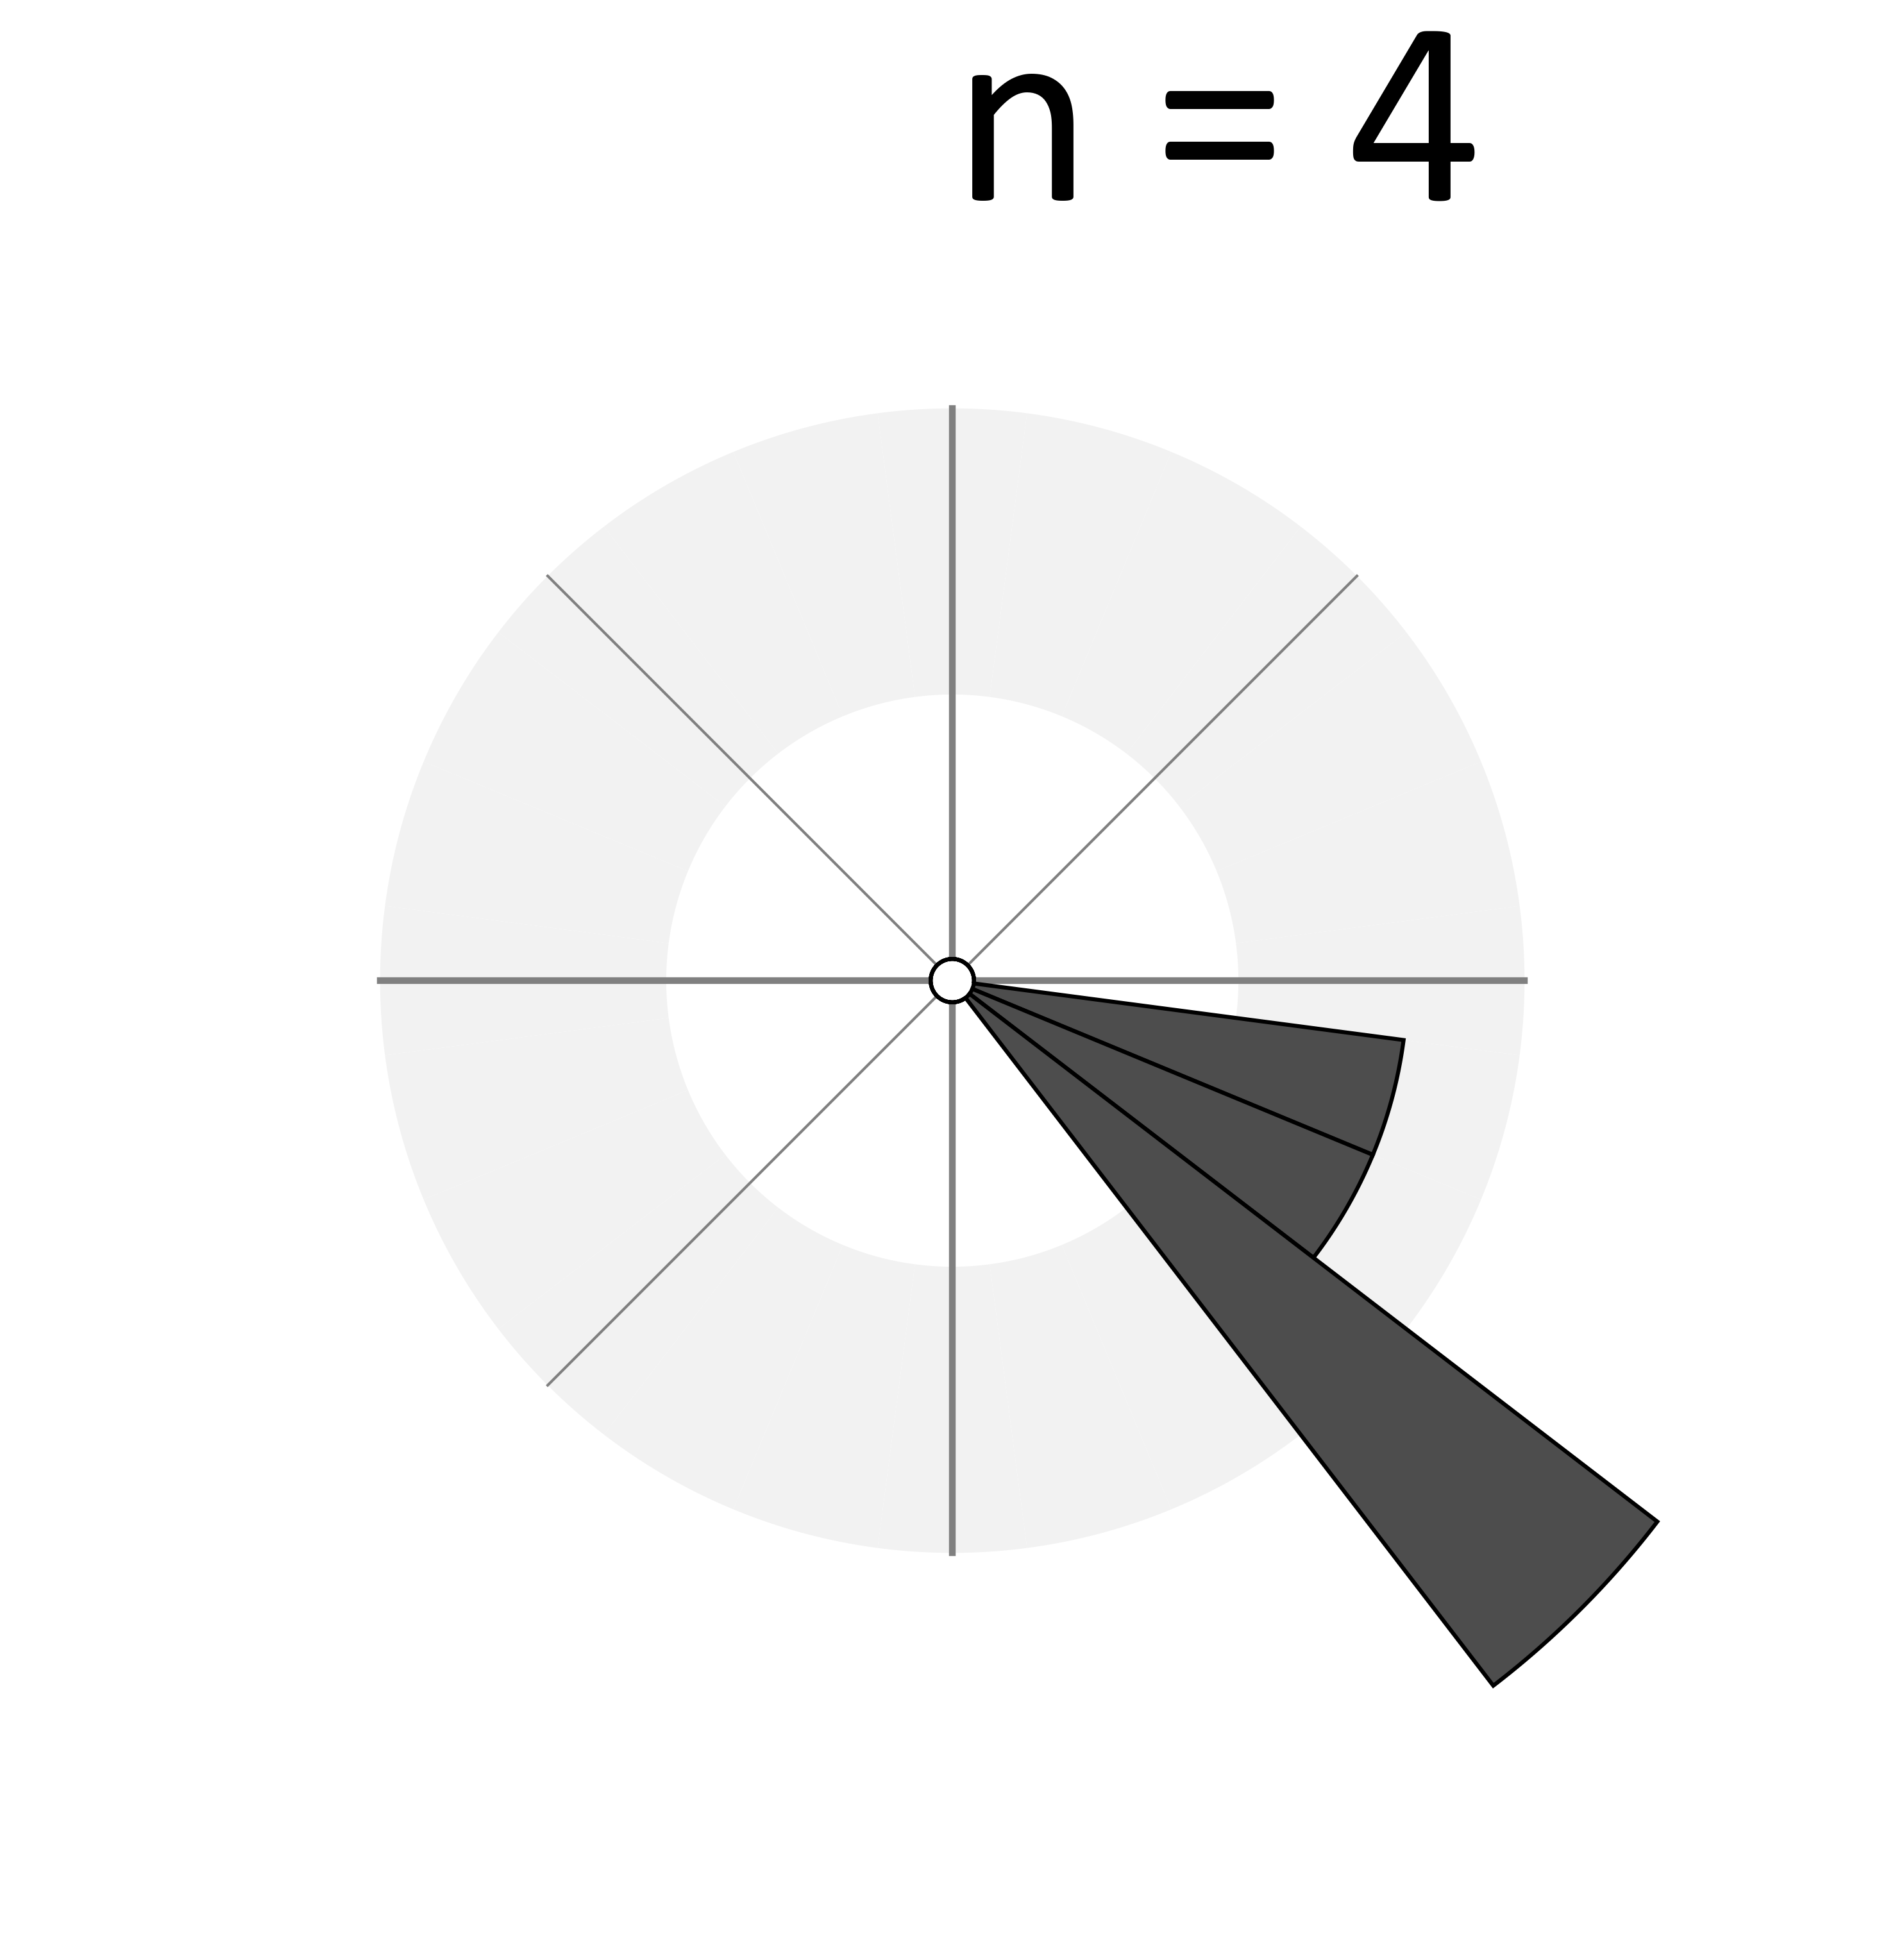

In [132]:
data_and_distribution(data,n_points)

plot_rose_diagram(df)